In [331]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [332]:
with open('historial_precios.pkl', 'rb') as f_math:
    df = pickle.load(f_math)

In [333]:
df.sample(3)
#df[df.isna().any(axis=1)]

,productos,categoria,2020-08-12,2020-08-13,2020-09-03,2020-09-29
125,YOGURT ENTERO VAINILLA TREGAR X125GR. S/TACC,lacteos,21.00,21.00,NaN,21.00
175,CUBANITOS ARBANIT DDL X12,golosinas,395.00,395.00,395.00,395.00
37,FECULA MANDIOCA MONTECARLO X 1KG.,almacen,94.00,94.00,94.00,94.00


In [334]:
df.categoria.unique()

array(['aderezos', 'almacen', 'verduras', 'hamburguesas', 'infusiones',
       'lacteos', 'milanesas', 'panificados', 'papas', 'pastas',
       'golosinas', 'queso/fiambres/salchichas',
       'quesos/fiambres/salchichas'], dtype=object)

In [335]:
df["categoria"] = df["categoria"].replace('quesos/fiambres/salchichas', 'queso/fiambres/salchichas')

# Limpieza Nans 1

In [336]:
for i in range(len(df)):
    for j in range(2,len(df.columns)-1):
        df.iloc[:,j].fillna(df.iloc[:,j+1],inplace=True)
        
for i in range(len(df)):
    for j in reversed(range(3,len(df.columns))):
        df.iloc[:,j].fillna(df.iloc[:,j-1],inplace=True)
            

In [337]:
df.isna().sum()

productos     0
categoria     0
2020-08-12    0
2020-08-13    0
2020-09-03    0
2020-09-29    0
dtype: int64

In [338]:
for columna in df.columns:
    if columna not in ['productos','categoria']:
        df[columna]=df[columna].astype(float)

In [339]:
df["categoria"] = df["categoria"].replace('queso/fiambres/salchichas', 'q/f/s')
df["categoria"] = df["categoria"].replace('hamburguesas', 'hamb')
df["categoria"] = df["categoria"].replace('panificados', 'panif')
df["categoria"] = df["categoria"].replace('golosinas', 'golos')
df["categoria"] = df["categoria"].replace('milanesas', 'milanes')
df["categoria"] = df["categoria"].replace('infusiones', 'infus')

# Aumentos

In [340]:
largo_df=len(df)
lista=[]
for i in range(largo_df):
    if df['2020-09-29'][i]>df['2020-08-12'][i]:
        lista.append(1)
    else:
        lista.append(0)

In [341]:
df['aumento']=lista
display(df[df.aumento==1].sample(4))
print('catalogo: ',len(df),'productos')
print('Aumentos: ',sum(lista))

,productos,categoria,2020-08-12,2020-08-13,2020-09-03,2020-09-29,aumento
225,CAFE EN GRANOS ESPRESSO CABRALES X500Gr,infus,570.0,570.0,570.0,680.0,1
86,H. UNION GANADERA X 40 DE 110GR.,hamb,2254.0,2254.0,2807.0,2807.0,1
122,YOGUR C/FRUTAS FRUTILLA DESC.TREGAR X 160GR. S...,lacteos,40.0,40.0,50.0,50.0,1
176,LICOR AL CHOCOLATE X 80GR.,golos,59.0,59.0,65.0,65.0,1


catalogo:  299 productos
Aumentos:  64


In [342]:
df['% aumento']=(df['2020-09-29']/df['2020-08-12']-1)*100

# Graficos

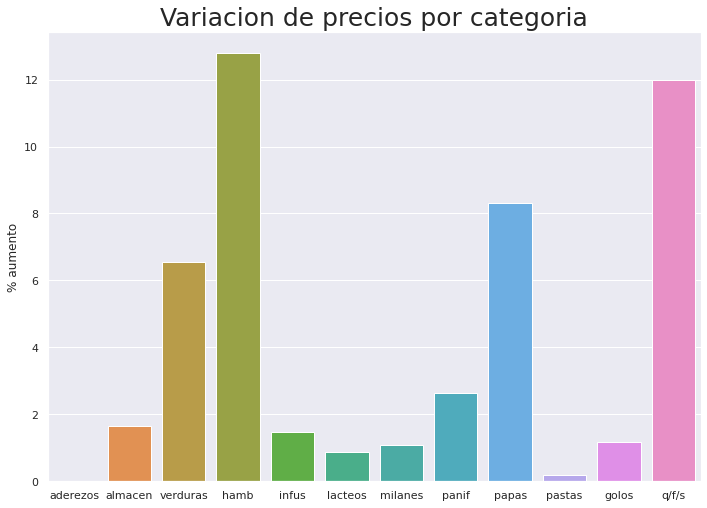

In [343]:
sns.barplot(x=df.categoria.unique(),y=df.groupby('categoria')['% aumento'].mean(),data=df)\
                                                .set_title('Variacion de precios por categoria',size=25);

In [344]:
df_aumentados=df[df.aumento==1]
df_aumentados['% aumento']=(df['2020-09-29']/df['2020-08-12']-1)*100

<ipython-input-344-a54e6dd6c6c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aumentados['% aumento']=(df['2020-09-29']/df['2020-08-12']-1)*100


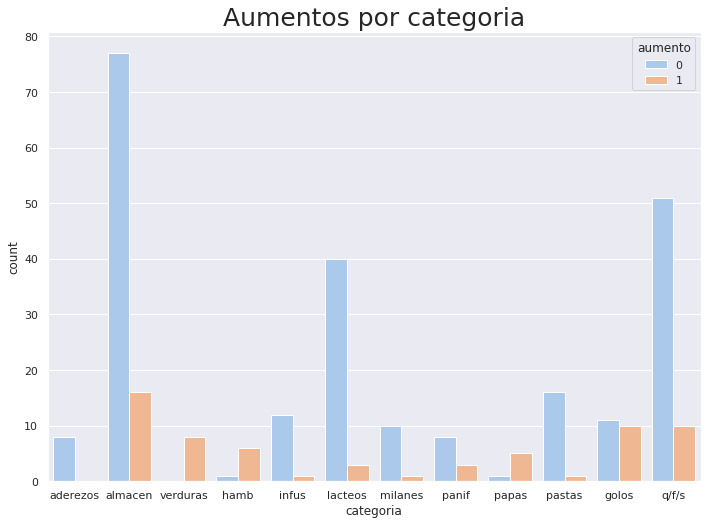

In [345]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
#sns.color_palette(palette='deep')
sns.set_palette("pastel")
sns.countplot(data=df, x="categoria", hue="aumento").set_title('Aumentos por categoria',size=25);

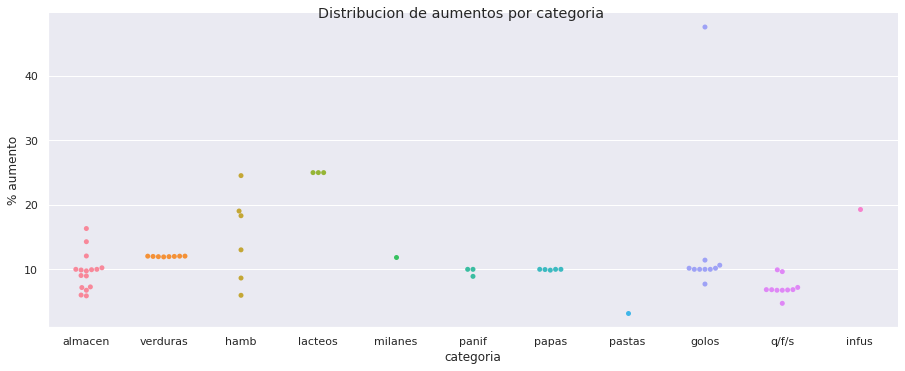

In [346]:
p=sns.catplot(x="categoria", y='% aumento', data=df_aumentados,height=5,kind='swarm',aspect=2.5);
p.fig.suptitle('Distribucion de aumentos por categoria');